# Question 1

In [5]:
import numpy as np
import scipy.stats as stats
import math


#Create list of sigmas, mus discrete values 
sigmas = list()
mus = list()

for i in range(5, 105, 5):
    sigmas.append(i)
    
for i in range(-100, 105, 10):
    mus.append(i)

By Bayes' Rule applied twice and conditioning 

$$ P(\mu| X, \sigma) = \frac{P(X | \mu, \sigma) P(\mu|\sigma)}{P(X | \sigma)}$$

$P(\mu|\sigma)$ is distributed uniform independently (since sigma known) so acts as a constant and can be discarded. The denominator is a distribution that does not involve $\mu$, so we can ignore it as a constant and re-introduce it by normalizing at the end so the probabilities add to one.  This formula, a cornerstone of statistical inference, is sumarized as: the posterior is proportional to the likelihood times the prior. Since the prior is uniform, the RHS will be just the likelihood. 

$$ P(\mu| X, \sigma) \propto {P(X | \mu, \sigma) }$$

The likelihood will be obtained from multiplying together normal distributions for each $X_i$ given $\mu, \sigma$. 

In [6]:
from scipy.stats import norm 
import matplotlib.pyplot as plt

#Create my script for the beginner's game 
def beg_g(X, sigma):
    Y  = np.array(X)
    n = len(X)
    
    #Create a dict of each mu value as a key and a 0 for the value 
    prods = {key: 0 for key in mus}
    
    #Update the dict by going through each mu value and calculating the product of gaussian pdfs 
    
    #The stats.norm.pdf can take an array(Y), and returns an array of the pdf evaluated at each value. 
    #The np.product function will take the product of each Y_i pdf returned by the stats.norm.pdf function 
    #This process is done for each mu value
    for x in mus:
        prods[x] = np.product((stats.norm.pdf(Y, loc=x, scale=sigma)))
        
    #Normalization since I work with proportional values 
    total = sum(prods.values())
    a = {k: v / total for k, v in prods.items()}
    
    #Return a dict of the posterior probabilities corresponding to a key mu 
    return a

#The given bar's script for beginner's game 
def probdist_beginner(X, sigma, mu_values):
    """ 
    Given an ndarray X_1..X_n, and a known sigma;
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X,sigma) for each column.
    """
    xbar = np.mean(X)
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= sigma / np.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

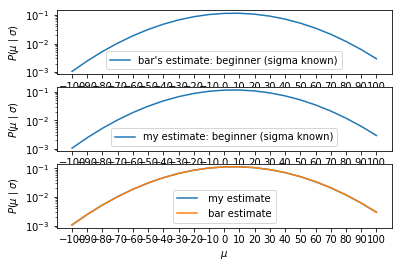

In [7]:
X = [ 11.50, -2.32, 9.18] # This is the data to be tested. This value can be changed to use any data 
sigma = 60 # This is the true sigma to be tested. This value can be changed to use any of the sigmas

f, (ax1, ax2, ax3) = plt.subplots(3,1, sharey=True)  # figure consists of 3 graphs, 3 rows x 1 col

#Calculate my probability and the bar's probability for data inputted above X, true sigma inputted above sigma, and
#the discrete list of mu values from earlier mus 

#Calcualte the probability of mu based on the given data X above and sigma 
PrB = probdist_beginner(X, sigma, mus)
PrA = beg_g(X, sigma)

#Individual plot for the bar's estimate 
ax1.semilogy(mus, PrB, label="bar's estimate: beginner (sigma known)")
ax1.xaxis.set_ticks(mus)
ax1.set(xlabel='$\mu$', ylabel='$P(\mu \mid \sigma)$')
ax1.legend(loc="best")

#Individual plots for my estimate
ax2.semilogy(mus, PrA.values(), label="my estimate: beginner (sigma known)")
ax2.xaxis.set_ticks(mus)
ax2.set(xlabel='$\mu$', ylabel='$P(\mu \mid \sigma)$')
ax2.legend(loc="best")

#Joint semilog plot of my probability estimate and the bar's to show equality
ax3.semilogy(mus, PrA.values(), label=" my estimate")
ax3.semilogy(mus, PrB, label=" bar estimate")
ax3.xaxis.set_ticks(mus)
ax3.set(xlabel='$\mu$', ylabel='$P(\mu \mid \sigma)$')
ax3.legend(loc="best")

plt.show()

We can see that my estimate and the bar's estimate of probabilities are identical. This is because the bar is calculating its probabilities properly here, due to the fact that $\bar{X}$ is a sufficient statistic for the data $X_i$ when considering $\mu$ with sigma known as proven below:

Consdier a random sample ${X_1...X_i}$ from a Normal population with mean $\mu$ and variance known, e.g. 4. I will show the sufficient statistic is $\bar{X}$. 

$$ f(X| \mu) = \prod_{i=1}^n f(x_i | \mu)  = (\frac{1}{\sqrt{2\pi* 4}})^n  e^{- \sum_1^n[(x_i - \mu)^2 / (2*4)]} = C e^{-\frac{1}{8} ( \sum x_i^2 + + n\mu^2 - 2n\bar{x} \mu)} = Ce^{-\frac{1}{8}(\sum_i^n x_i^2 + n \mu^2) }e^{-\frac{1}{4} (n\bar{x}\mu)}$$

The factorization theorem states: 

Let $X_1, X_2, · · · , X_n$ be a random sample 
with joint density $f(x_1, x_2, · · · , x_n| \theta)$. A statistic $T = r(X_1, X_2, · · · , X_n)$
is sufficient if and only if the joint density can be factored as follows:
$f(x_1, x_2, · · · , x_n| \theta) = u(x_1, x_2, · · · , x_n) v(r(x_1, x_2, · · · , x_n), \theta)$


Thus, from the factorization above, $\bar{X}$ is a sufficient statistic for the data $X_i$ when calculating the mean from a normal. That is, our calculation using all of the data and the bar's calculation using $\bar{X}$ will be the same. 

# Question 2

According to Bayes' Theorem, the posterior probability distribution is proportional to the product of a prior distribution and a likelihood function. The uniform prior distribution may be discarded as it is a constant. So we simply must examine the likelihood function. Since we have discrete values, for each discrete sigma value we can calculate the conditional distribution of mu. 

Then the likelihood term $L(\mu, \sigma|X) = P(X|\mu, \sigma)$ has the familiar form from before
$$\prod_{i=1}^n \bigg( \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x_i - \mu)^2}{2\sigma^2}} \bigg)$$
Which is the product of the pdfs for each $x_i$ given each of the 420 discrete combinations of $\mu, \sigma$. 

In [8]:
import itertools

    
#Create all permutations of mus, sigmas in a dict 
result = list(itertools.product(*(mus, sigmas)))
aprod = {key: 0 for key in result}




In [9]:
def adv_g(X):
    Y  = np.array(X)
    n = len(X)

    #Similar to before, for each of the 420 combinations of mu, sigma calculate the product of the PDFs evaluated at
    #each data value. This is the liklihood, which is proportional to the posterior given uniform prior. 
    
    for x in sigmas:
        for y in mus:
            aprod[y, x] = np.product((stats.norm.pdf(Y, loc=y, scale=x)))
    
    #Normalize 
    total = sum(list(aprod.values()))
    a = {k: v / total for k, v in aprod.items()}
       
    #Return a dict of each of the 420 combination's liklihood 
    return a


#The given bar's script for advanced game 
def probdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X) for each column.
    """
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)     # note that numpy.sd() by default calculates a population std dev; to get sample std. dev., set ddof=1
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= s / np.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

#The given correct t-distribution for the probabilities values. 
def tdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X) for each column,
	according to Student's t distribution with N-1 degrees of freedom.
    """
    N    = len(X)
    t    = [ stats.ttest_1samp(X, mu)[0] for mu in mu_values ]
    Pr   = [ stats.t.pdf(val, N-1) for val in t ]
    Z    = sum(Pr)
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

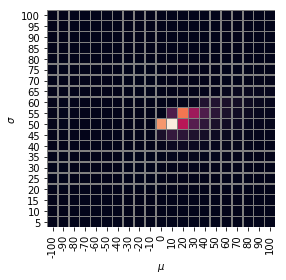

In [10]:
#Use the earlier defined example data X to get an output of probabilities for each combination sigma, mu 
x = adv_g(X=X)

import seaborn as sns
#Reshape the values into a 20x21 grid. 
a = np.array(list(x.values()))
b = np.reshape(a, (20,21))

# Code below copied from the link on homework
# Set up the x and y coords
gridrows = np.linspace( 100.0,   5.0, 20)   # rows of the board: std. dev., sigma
gridcols = np.linspace(-100.,  100.0, 21)   # cols of the board: mean (location), mu
nrows    = len(gridrows)
ncols    = len(gridcols)


# Format axis labels as strings, with values as "10" not "10.0" for clarity, space
xlabels = [ "{0:.0f}".format(val) for val in gridcols ]
ylabels = [ "{0:.0f}".format(val) for val in gridrows ]

# the Seaborn "heatmap" plot

ax = sns.heatmap(b,                 # takes a 2D array of data
                 xticklabels=xlabels,  #   ... set custom x axis labels
                 yticklabels=ylabels,  #   ... set custom y axis labels
                 cbar=False,           #   ... turn off the default color scale bar
                 square=True,          #   ... force the plot to be square
                 linecolor='grey',     #   ... set grid line color
                 linewidth=0.5)        #   ... set grid line width

# now we have an Axes object that Seaborn returned to us,
# and we can do additional customization, like...

ax.set(xlabel='$\mu$',                 # ...set X axis label, using LaTeX formatting
       ylabel='$\sigma$')              # ...and Y axis label
for label in ax.get_yticklabels():    
    label.set_size(10)                 # ... and font size on y-axis tick labels
for label in ax.get_xticklabels():    
    label.set_size(10)                 # ... and on x-axis tick labels
    
    
    



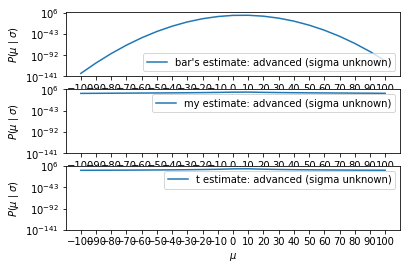

In [11]:
#Get the probability of mu directly by summing over sigma to marginalize it out of the equation
q = list(x.values())
r = list()
for i in range(0, len(q), 20):
    r.append(sum(q[i:i+20]))
    

f, (ax1, ax2, ax3) = plt.subplots(3,1, sharey=True)  # figure consists of 2 graphs, 2 rows x 1 col
X = [ 11.50, -2.32, 9.18]

PrC = tdist_advanced(X, mus)
PrB = probdist_advanced(X, mus)
PrA = r

#Bar's estimate using a less-accurate normal model with sigma inferred from S, sample variance 
ax1.semilogy(mus, PrB, label="bar's estimate: advanced (sigma unknown)")
ax1.xaxis.set_ticks(mus)
ax1.set(xlabel='$\mu$', ylabel='$P(\mu \mid \sigma)$')
ax1.legend(loc="best")

#My estimate using a Bayesian analysis that mirrors the t distribution 
ax2.semilogy(mus, PrA, label="my estimate: advanced (sigma unknown)")
ax2.xaxis.set_ticks(mus)
ax2.set(xlabel='$\mu$', ylabel='$P(\mu \mid \sigma)$')
ax2.legend(loc="best")

#True t distribution calculation 
ax3.semilogy(mus, PrC, label="t estimate: advanced (sigma unknown)")
ax3.xaxis.set_ticks(mus)
ax3.set(xlabel='$\mu$', ylabel='$P(\mu \mid \sigma)$')
ax3.legend(loc="best")

plt.show()

# Question 3


The pub is calculating the beginner game odds correctly. This is because $\bar{X}$ is a sufficient statistic for the data $X_1 ... X_i$. My method uses each individual observation, but working with the sample mean also gives a correct solution as the standard deviation is known. 

In the advanced game, the pub is underestimating the variance. This is because the pub samples from a normal distribution. When the population variance is unknown, it is more accurate to sample from a t-distribution. The t-distribution has fat tails under low sample size, so more extreme values of means will be given relatively higher probabilities when compared to a normal. The pub's method leads to deflated odds for values of mu away from xbar. 

More technically, a t distribution arises from the ratio of a normal distribution (the mean) and a chi-sqaure distribution divided by its degrees of freedom. This is because the standard error can be modeled through chi-distributions, which are right-skewed under low sample size.

Below is a comparison of a true t calculation to my Bayesian: in general it is pretty close! 

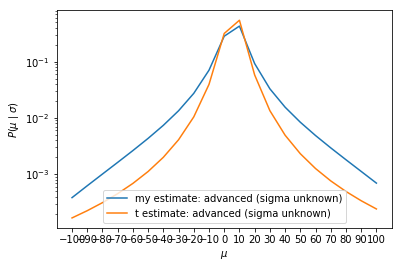

In [12]:
f, (ax2) = plt.subplots(1,1, sharey=True)  # figure consists of 2 graphs, 2 rows x 1 col

#Directly compare my estimate to the t distribution 
ax2.semilogy(mus, r, label="my estimate: advanced (sigma unknown)")
ax2.semilogy(mus, PrC, label="t estimate: advanced (sigma unknown)")
ax2.xaxis.set_ticks(mus)
ax2.set(xlabel='$\mu$', ylabel='$P(\mu \mid \sigma)$')
ax2.legend(loc="best")


plt.show()

When we look at the end plot of Q2, we can see the pub vastly underestimates the probability of "extreme" mu values, where extreme is defined as $\bar{X}$ being far from the sample mean. It is doing this because its model assumes a smaller range of likely variances compared to the t distributions assumption of fatter tails (e.g. higher probability of extreme values). A betting strategy arises from this: bet on mean values relatively far away from the sample mean to get much better odds (orders of magnitude) than you should, especially under small sample size. For large sample size, the pub will do a better job estimating true odds as the t distribution approaches the normal when degrees of freedom (sample size) increases.    

In [13]:
vals= np.array(mus)
A = np.column_stack((mus, r,PrB))
print(A)



[[-1.00000000e+002  3.83958020e-004  1.10998181e-134]
 [-9.00000000e+001  6.24330079e-004  1.25794383e-110]
 [-8.00000000e+001  1.00797974e-003  5.95956511e-089]
 [-7.00000000e+001  1.62435093e-003  1.18025492e-069]
 [-6.00000000e+001  2.63222193e-003  9.77113479e-053]
 [-5.00000000e+001  4.33652237e-003  3.38159911e-038]
 [-4.00000000e+001  7.38902825e-003  4.89223342e-026]
 [-3.00000000e+001  1.34044187e-002  2.95869469e-016]
 [-2.00000000e+001  2.73390546e-002  7.47999083e-009]
 [-1.00000000e+001  7.04265447e-002  7.90514631e-004]
 [ 0.00000000e+000  2.82854960e-001  3.49242181e-001]
 [ 1.00000000e+001  4.27407603e-001  6.44987656e-001]
 [ 2.00000000e+001  9.23211257e-002  4.97948063e-003]
 [ 3.00000000e+001  3.29078805e-002  1.60703237e-007]
 [ 4.00000000e+001  1.55222249e-002  2.16806916e-014]
 [ 5.00000000e+001  8.38614056e-003  1.22272720e-023]
 [ 6.00000000e+001  4.86826020e-003  2.88266349e-035]
 [ 7.00000000e+001  2.93802583e-003  2.84096743e-049]
 [ 8.00000000e+001  1.808385

In [15]:
b.shape

(20, 21)

For the above, an array is created with the mean values on the far left, my estimates of the probability given the data in the middle, and the bar's estimates on the right. This is done for the example data X, which in reality has a high sigma so could have a mu significantly different than the $\bar{x}$. For example, an "extreme" value of $\mu = 70$ is unlikely, but possible given the high standard deviation. In my model, this probability is estimated to be $2.9 \cdot 10^{-3}$ while the bar estimates this probability at $2.84 \cdot 10^{-49}$ which is an enormous amount lower. Thus a small bet on extreme values has a very positive expected value.